Import Necessary Modules

In [5]:
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, make_scorer,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score
from time import time
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
import nltk
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from collections import Counter
import docx
import matplotlib.pyplot as plt

Import Dataset

In [6]:
formspring='https://raw.githubusercontent.com/eimearfoley/CyberBullyingDetection/master/data/formspring.csv'

In [7]:
df=pd.read_csv(formspring)

Analyze Dataset

In [8]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12901 entries, 0 to 12900
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userid     12896 non-null  object
 1   post       12852 non-null  object
 2   ques       12852 non-null  object
 3   ans        12820 non-null  object
 4   asker      12801 non-null  object
 5   ans1       12759 non-null  object
 6   severity1  12788 non-null  object
 7   bully1     1909 non-null   object
 8   ans2       12701 non-null  object
 9   severity2  12739 non-null  object
 10  bully2     1786 non-null   object
 11  ans3       12655 non-null  object
 12  severity3  12698 non-null  object
 13  bully3     1780 non-null   object
dtypes: object(14)
memory usage: 1.4+ MB


,userid,post,ques,ans,asker,ans1,severity1,bully1,ans2,severity2,bully2,ans3,severity3,bully3
0,aguitarplayer94,Q: what&#039;s your favorite song? :D<br>A: I ...,what&#039;s your favorite song? :D<br>,I like too many songs to have a favorite,None,No,0,NaN,No,0,NaN,No,0,NaN
1,aprilpooh15,Q: <3<br>A: </3 ? haha jk! <33,<3,</3 ? haha jk! <33,None,No,0,NaN,No,0,NaN,No,0,NaN
2,aprilpooh15,Q: &quot;hey angel you duh sexy&quot;<br>A: R...,&quot;hey angel you duh sexy&quot;,Really?!?! Thanks?! haha,None,No,0,NaN,No,0,NaN,No,0,NaN
3,aprilpooh15,Q: (:<br>A: ;(,(:,;(,None,No,0,NaN,No,0,NaN,No,0,NaN
4,aprilpooh15,Q: ******************MEOWWW*******************...,******************MEOWWW*************************,*RAWR*?,None,No,0,NaN,No,0,NaN,No,0,NaN


In [9]:
df['post'][:10]

0    Q: what&#039;s your favorite song? :D<br>A: I ...
1                       Q: <3<br>A: </3 ? haha jk! <33
2    Q: &quot;hey angel  you duh sexy&quot;<br>A: R...
3                                       Q: (:<br>A: ;(
4    Q: ******************MEOWWW*******************...
5    Q: any makeup tips? i suck at doing my makeup ...
6    Q: Apriiiiiiiiiiiill!!! I miss uuuu! It&#039;s...
7    Q: Are you a morning or night person?<br>A: Ni...
8    Q: are you a trusting person?<br>A: alreadi an...
9    Q: are you a trusting person?<br>A: Yes veryy ...
Name: post, dtype: object

In [10]:
df['ques'][:10]

0               what&#039;s your favorite song? :D<br>
1                                                   <3
2                  &quot;hey angel  you duh sexy&quot;
3                                                   (:
4    ******************MEOWWW*************************
5       any makeup tips? i suck at doing my makeup lol
6    Apriiiiiiiiiiiill!!! I miss uuuu! It&#039;s Em...
7                   Are you a morning or night person?
8                           are you a trusting person?
9                           are you a trusting person?
Name: ques, dtype: object

In [11]:
df['ans'][:10]

0             I like too many songs to have a favorite
1                                   </3 ? haha jk! <33
2                             Really?!?! Thanks?! haha
3                                                   ;(
4                                              *RAWR*?
5     Sure! Like tell me wht u wnna know?! Like wht...
6     EMMA hahahahah :D I MISSSSSeddd YUHHHHh 22222...
7                                      Night 4shuree!!
8                                       alreadi answrd
9         Yes veryy trustin person!!! May i help yuh:!
Name: ans, dtype: object

In [12]:
df['bully1'][100:110]

100    NaN
101    NaN
102    NaN
103    NaN
104    NaN
105    NaN
106    NaN
107    NaN
108    NaN
109    NaN
Name: bully1, dtype: object

In [13]:
df['bully1'].value_counts()

None                                                     593
Na                                                        89
N/A.                                                      74
no                                                        47
N/a                                                       47
                                                        ... 
ur a slut and i dont wanna talk shit but ru be honest      1
jizzed to pics of you                                      1
obese                                                      1
wtf get outa hea bxtch!                                    1
first 3 way attack on the phone                            1
Name: bully1, Length: 1012, dtype: int64

In [14]:
print(df['ans1'].value_counts())
print(df['ans2'].value_counts())
print(df['ans3'].value_counts())

No     11693
Yes     1038
0         12
5          5
3          5
1          2
6          1
2          1
4          1
7          1
Name: ans1, dtype: int64
No     11696
Yes     1005
Name: ans2, dtype: int64
No     11711
Yes      944
Name: ans3, dtype: int64


In [15]:
df = df[df['post'].notna()]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12852 entries, 0 to 12900
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userid     12852 non-null  object
 1   post       12852 non-null  object
 2   ques       12850 non-null  object
 3   ans        12819 non-null  object
 4   asker      12801 non-null  object
 5   ans1       12759 non-null  object
 6   severity1  12788 non-null  object
 7   bully1     1909 non-null   object
 8   ans2       12701 non-null  object
 9   severity2  12739 non-null  object
 10  bully2     1786 non-null   object
 11  ans3       12655 non-null  object
 12  severity3  12698 non-null  object
 13  bully3     1780 non-null   object
dtypes: object(14)
memory usage: 1.5+ MB


In [17]:
ans=np.array(df['ans'])
ques=np.array(df['ques'])
posts=[]
for i in range (0,len(ans)):
  posts.append(str(ques[i])+str(ans[i]))

In [18]:
print(ques[0])
print(ans[0])
print(posts[0])

what&#039;s your favorite song? :D<br>
 I like too many songs to have a favorite
what&#039;s your favorite song? :D<br> I like too many songs to have a favorite


In [19]:
y1=np.array(df['ans1'])
y2=np.array(df['ans2'])
y3=np.array(df['ans3'])

In [20]:
X=[]
y=[]
for i in range (len(posts)):
  X.append(posts[i])
  if y1[i]=='Yes' :
    y.append(1)
  else:
    y.append(0)

Data Preprocessing

In [21]:
X=np.array(X)
X=np.reshape(X,(-1,1))
y=np.array(y)


In [22]:
X.shape,y.shape

((12852, 1), (12852,))

In [23]:
print(Counter(y))

Counter({0: 11814, 1: 1038})


In [24]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler( sampling_strategy=0.3)
X,y=oversample.fit_sample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [25]:
X.shape,y.shape

((15358, 1), (15358,))

In [26]:
print(Counter(y))

Counter({0: 11814, 1: 3544})


In [27]:
X[:6],y[:6]

(array([['what&#039;s your favorite song? :D<br> I like too many songs to have a favorite'],
        ['<3 </3 ? haha jk! <33'],
        ['&quot;hey angel  you duh sexy&quot; Really?!?! Thanks?! haha'],
        ['(: ;('],
        ['******************MEOWWW************************* *RAWR*?'],
        ['any makeup tips? i suck at doing my makeup lol Sure! Like tell me wht u wnna know?! Like wht do you use?!']],
       dtype='<U5541'), array([0, 0, 0, 0, 0, 0]))

In [28]:
type(X)

numpy.ndarray

In [29]:
X=[str(x) for x in X]

In [30]:
type(X)

list

Create Word Embeddings

In [31]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [32]:
stopwords=nltk.corpus.stopwords.words('english')

In [33]:
contractions =dict({ 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": " he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that has",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they had",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who has",
"who've": "who have",
"why's": "why has",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have",
"ain’t": "am not",
"aren’t": "are not",
"can’t": "cannot",
"can’t’ve": "cannot have",
"’cause": "because",
"could’ve": "could have",
"couldn’t": "could not",
"couldn’t’ve": "could not have",
"didn’t": "did not",
"doesn’t": "does not",
"don’t": "do not",
"hadn’t": "had not",
"hadn’t’ve": "had not have",
"hasn’t": "has not",
"haven’t": "have not",
"he’d": " he would",
"he’d’ve": "he would have",
"he’ll": "he will",
"he’ll’ve": "he will have",
"he’s": "he is",
"how’d": "how did",
"how’d’y": "how do you",
"how’ll": "how will",
"how’s": "how is",
"i’d": "i would",
"i’d’ve": "i would have",
"i’ll": "i will",
"i’ll’ve": "i will have",
"i’m": "i am",
"i’ve": "i have",
"isn’t": "is not",
"it’d": "it would",
"it’d’ve": "it would have",
"it’ll": "it will",
"it’ll’ve": "it will have",
"it’s": "it is",
"let’s": "let us",
"ma’am": "madam",
"mayn’t": "may not",
"might’ve": "might have",
"mightn’t": "might not",
"mightn’t’ve": "might not have",
"must’ve": "must have",
"mustn’t": "must not",
"mustn’t’ve": "must not have",
"needn’t": "need not",
"needn’t’ve": "need not have",
"o’clock": "of the clock",
"oughtn’t": "ought not",
"oughtn’t’ve": "ought not have",
"shan’t": "shall not",
"sha’n’t": "shall not",
"shan’t’ve": "shall not have",
"she’d": "she would",
"she’d’ve": "she would have",
"she’ll": "she will",
"she’ll’ve": "she will have",
"she’s": "she is",
"should’ve": "should have",
"shouldn’t": "should not",
"shouldn’t’ve": "should not have",
"so’ve": "so have",
"so’s": "so is",
"that’d": "that would",
"that’d’ve": "that would have",
"that’s": "that has",
"there’d": "there would",
"there’d’ve": "there would have",
"there’s": "there is",
"they’d": "they had",
"they’d’ve": "they would have",
"they’ll": "they will",
"they’ll’ve": "they will have",
"they’re": "they are",
"they’ve": "they have",
"to’ve": "to have",
"wasn’t": "was not",
"we’d": "we would",
"we’d’ve": "we would have",
"we’ll": "we will",
"we’ll’ve": "we will have",
"we’re": "we are",
"we’ve": "we have",
"weren’t": "were not",
"what’ll": "what will",
"what’ll’ve": "what will have",
"what’re": "what are",
"what’s": "what is",
"what’ve": "what have",
"when’s": "when is",
"when’ve": "when have",
"where’d": "where did",
"where’s": "where is",
"where’ve": "where have",
"who’ll": "who will",
"who’ll’ve": "who will have",
"who’s": "who has",
"who’ve": "who have",
"why’s": "why has",
"why’ve": "why have",
"will’ve": "will have",
"won’t": "will not",
"won’t’ve": "will not have",
"would’ve": "would have",
"wouldn’t": "would not",
"wouldn’t’ve": "would not have",
"y’all": "you all",
"y’all’d": "you all would",
"y’all’d’ve": "you all would have",
"y’all’re": "you all are",
"y’all’ve": "you all have",
"you’d": "you would",
"you’d’ve": "you would have",
"you’ll": "you will",
"you’ll’ve": "you will have",
"you’re": "you are",
"you’ve": "you have"
})

In [34]:
corpus=[]
for para in X:
    sentences=nltk.sent_tokenize(para)
    temp=[]
    for sentence in sentences:
        sentence=sentence.lower()
        cleanr = re.compile('<.*?>')
        sentence = re.sub(cleanr, '', sentence)
        sentence=re.sub(r'[\!"#$%&\*+,./;<=>?@_`|~=]','',sentence)
        sentence=re.sub(r'[0-9]+', '',sentence)
        words=sentence.split()
        words_list=[]
        for word in words:
          if word in contractions:
            words_list.append(contractions[word])
          elif word not in stopwords:
            words_list.append(WordNetLemmatizer().lemmatize(word))
        sent=' '.join(words_list)
        temp.append(sent)
    corpus.append(' '.join(temp))

In [35]:
len(corpus)

15358

In [36]:
corpus[:6]

["['whats favorite song :d like many song favorite']",
 "[' haha jk ']",
 "['quothey angel duh sexyquot really thanks haha']",
 "['(: (']",
 "['meowww rawr']",
 "['any makeup tip suck makeup lol sure like tell wht u wnna know like wht use']"]

Train-Test Split and model testing

In [37]:
X_train,X_test,y_train,y_test=train_test_split(corpus,y,test_size=0.2,random_state=42)

In [38]:
X_train_,X_test_,y_train_,y_test_=X_train,X_test,y_train,y_test

In [39]:
X_train,X_test,y_train,y_test=X_train_,X_test_,y_train_,y_test_

Create Feature Vectors

In [40]:
vec=TfidfVectorizer(max_features=10000,ngram_range=(1,1))
X_train=vec.fit_transform(X_train)
X_test=vec.transform(X_test)

In [41]:
tfidf_tokens = vec.get_feature_names()

In [42]:
len(tfidf_tokens)

10000

Different Classifiers Testing

In [43]:
def pipeline(learner_list, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    # Get length of Training Data:
    size = len(y_train)
    
    results = {}
    final_results = []
    
    fpr=[]
    tpr=[]
    labels=[]
    r_proba=[0 for _ in range(len(y_test))]
    l_fpr,l_tpr,_=roc_curve(y_test,r_proba)
    fpr.append(l_fpr)
    tpr.append(l_tpr)
    labels.append("No learning model: AUC =0.5")
    for learner in learner_list:
        
        results['Algorithm'] = learner.__class__.__name__

        start = time() 
        print("Training {}".format(learner.__class__.__name__))
        learner = learner.fit(X_train, y_train)
        end = time() 
        
        results['Training Time'] = '%.4f'%(end - start)

        start = time() 
        predictions_test = learner.predict(X_test)
        end = time() 

        results['Prediction Time'] = '%.4f'%(end - start)

        results['Accuracy'] = '%.4f'%accuracy_score(y_test, predictions_test)

        results['F1 Score'] = '%.4f'%f1_score(y_test, predictions_test)

        auc='%.4f'%roc_auc_score(y_test, predictions_test)
        results['AUC Score'] = auc

        results['Precision'] = '%.4f'%precision_score(y_test, predictions_test)

        results['Recall'] = '%.4f'%recall_score(y_test, predictions_test)

        y_proba=learner.predict_proba(X_test)
        y_proba=y_proba[:,1]

        l_fpr,l_tpr,_=roc_curve(y_test,y_proba)
        fpr.append(l_fpr)
        tpr.append(l_tpr)
        labels.append(learner.__class__.__name__+": AUC ="+str(auc))


        final_results.append(results.copy())
    for i in range(len(labels)):
      plt.plot(fpr[i],tpr[i],label=labels[i])
    plt.title('ROC plot')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()
    return final_results

In [57]:
models = [SVC(probability=True),MultinomialNB(), DecisionTreeClassifier(), AdaBoostClassifier(), 
          RandomForestClassifier(), BaggingClassifier(),
         LogisticRegression(), KNeighborsClassifier()]

Training SVC
Training MultinomialNB
Training DecisionTreeClassifier
Training AdaBoostClassifier
Training RandomForestClassifier
Training BaggingClassifier
Training LogisticRegression
Training KNeighborsClassifier


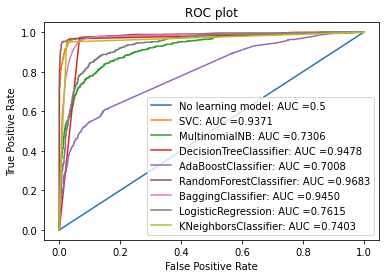

In [58]:
re = pipeline(models, X_train, y_train, X_test, y_test)
results = pd.DataFrame(re)
results = results.reindex(columns = ['Algorithm', 'Accuracy', 'Precision', 'Recall', 'F1 Score','AUC Score','Prediction Time'])

In [59]:
results

,Algorithm,Accuracy,Precision,Recall,F1 Score,AUC Score,Prediction Time
0,SVC,0.9622,0.9434,0.8903,0.9161,0.9371,3.0274
1,MultinomialNB,0.8669,0.9016,0.4768,0.6237,0.7306,0.0005
2,DecisionTreeClassifier,0.9401,0.8133,0.9620,0.8814,0.9478,0.0033
3,AdaBoostClassifier,0.8340,0.7269,0.4529,0.5581,0.7008,0.0398
4,RandomForestClassifier,0.9762,0.9443,0.9536,0.9489,0.9683,0.3079
5,BaggingClassifier,0.9411,0.8216,0.9522,0.8821,0.9450,0.0378
6,LogisticRegression,0.8737,0.8488,0.5527,0.6695,0.7615,0.0004
7,KNeighborsClassifier,0.8743,0.9357,0.4909,0.6439,0.7403,0.9442


In [60]:
results.sort_values(by = 'AUC Score', inplace = True, ascending = False)

In [61]:
results.reset_index(drop = True)

,Algorithm,Accuracy,Precision,Recall,F1 Score,AUC Score,Prediction Time
0,RandomForestClassifier,0.9762,0.9443,0.9536,0.9489,0.9683,0.3079
1,DecisionTreeClassifier,0.9401,0.8133,0.9620,0.8814,0.9478,0.0033
2,BaggingClassifier,0.9411,0.8216,0.9522,0.8821,0.9450,0.0378
3,SVC,0.9622,0.9434,0.8903,0.9161,0.9371,3.0274
4,LogisticRegression,0.8737,0.8488,0.5527,0.6695,0.7615,0.0004
5,KNeighborsClassifier,0.8743,0.9357,0.4909,0.6439,0.7403,0.9442
6,MultinomialNB,0.8669,0.9016,0.4768,0.6237,0.7306,0.0005
7,AdaBoostClassifier,0.8340,0.7269,0.4529,0.5581,0.7008,0.0398


In [62]:
best_acc = results[results['Accuracy'] == results['Accuracy'].max()]
best_f1 = results[results['F1 Score'] == results['F1 Score'].max()]
best_precision = results[results['Precision'] == results['Precision'].max()]
best_recall = results[results['Recall'] == results['Recall'].max()]

In [63]:
print(best_acc)
print(best_f1)
print(best_precision)
print(best_recall)

                Algorithm Accuracy Precision  ... F1 Score AUC Score Prediction Time
4  RandomForestClassifier   0.9762    0.9443  ...   0.9489    0.9683          0.3079

[1 rows x 7 columns]
                Algorithm Accuracy Precision  ... F1 Score AUC Score Prediction Time
4  RandomForestClassifier   0.9762    0.9443  ...   0.9489    0.9683          0.3079

[1 rows x 7 columns]
                Algorithm Accuracy Precision  ... F1 Score AUC Score Prediction Time
4  RandomForestClassifier   0.9762    0.9443  ...   0.9489    0.9683          0.3079

[1 rows x 7 columns]
                Algorithm Accuracy Precision  ... F1 Score AUC Score Prediction Time
2  DecisionTreeClassifier   0.9401    0.8133  ...   0.8814    0.9478          0.0033

[1 rows x 7 columns]
